In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests
import scipy

In [20]:
def process(categories, categories_rand, names):
    CTEs = [np.mean(c) for c in categories]
    CTEs_rand = [np.mean(c) for c in categories_rand]
    error = [np.std(c) for c in categories]
    error_rand = [np.std(c) for c in categories_rand]
    x_pos = np.arange(len(categories))*5
    return CTEs, CTEs_rand, error, error_rand, x_pos

In [21]:
# Build the plot
def build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected, title, leg_loc):
    plt.rc('font', size=20)
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 8)
    plt.yticks(np.arange(0, 1, 0.1))
    ax.bar(x_pos, CTEs, yerr=error, align='center', color='blue', alpha=0.8, ecolor='black', capsize=20, width=2)
    ax.bar(x_pos+2, CTEs_rand, yerr=error_rand, align='center', color='red', alpha=0.8, ecolor='black', capsize=20, width=2)
    ax.set_ylabel('AUC')
    ax.set_xticks(x_pos+1)
    ax.set_xticklabels(names)
    ax.set_title(title)
    ax.yaxis.grid(True)
    ax.legend(['Model', 'Random'], loc=leg_loc)
    ax.patches
    i = 0
    for p, pval in zip(ax.patches, pvals_corrected):
        if pval < 0.001:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '***', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        if pval < 0.01:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '**', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        if pval < 0.05:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '*', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        # ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 'n.s.', ha='center')
        i += 1
    # Save the figure and show
    # plt.tight_layout()
    # plt.savefig('bar_plot_with_error_bars.png')
    plt.show()
    return

In [22]:
def ttest(names, categories, categories_rand):
    pvals = []
    for r, u, v in zip(names, categories, categories_rand):
        print(r,':')
        t_stat = stats.ttest_ind(u, v).statistic
        pval = stats.ttest_ind(u, v).pvalue / 2
        print('t-statistic:', t_stat, 'p-value:', pval)
        pvals.append(pval)
    # Create a list of the adjusted p-values
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='bonferroni') 
    print("Bonferroni:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='fdr_bh') # Benjamini/Hochberg
    print("Benjamini/Hochberg:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)
    return pvals_corrected

In [23]:
all_ns=[]
all_aucs=[]
# CSI1
x=[973+324, 560+233, 563+300, 439+43, 210+8, 417+14, 274+10, 414+21, 654+14]
person = [0.7785934, 0.7902058, 0.8144967, 0.7993604, 0.6957953, 0.78516525, 0.81369853, 0.74844253]
face = [0.83686125, 0.8601667, 0.84533286, 0.8287057, 0.75272024, 0.88401073, 0.8057525, 0.8155809]
animal = [0.728, 0.778, 0.832, 0.724, 0.685, 0.763, 0.760, 0.822]
vehicle = [0.63666004, 0.7749062, 0.70542634, 0.6765815, 0.5861905, 0.66044986, 0.637699, 0.72237015]
outdoor = [0.6075605, 0.595832, 0.58580244, 0.61947834, 0.48774514, 0.68280077, 0.64264286, 0.64079547]
sports = [0.67907643, 0.8179509, 0.8033872, 0.7283197, 0.6249999, 0.7426069, 0.67639476, 0.7721769]
food = [0.83188015, 0.7146096, 0.78497267, 0.7598106, 0.7156991, 0.71799564, 0.777656, 0.76861054]
furniture = [0.74236554, 0.63419354, 0.67153484, 0.56088924, 0.6056729, 0.6840717, 0.6891775, 0.6668134]
tool = [0.63215446, 0.6133107, 0.6596611, 0.5776302, 0.60100305, 0.5842055, 0.58849084, 0.58240765]
for i, ca in enumerate([person, face, animal, vehicle, outdoor, sports, food, furniture, tool]):
    all_aucs.append(np.array(ca).mean(axis=0))
    all_ns.append(x[i])
# CSI2
person = [0.698701, 0.687531, 0.6658986, 0.7750946, 0.6723981, 0.6289042, 0.66271806, 0.75362545]
face = [0.7179583, 0.8204029, 0.85288906, 0.85607857, 0.8059592, 0.7545908, 0.7189794, 0.70609695]
animal = [0.7271656, 0.70883465, 0.62890434, 0.609156, 0.6617983, 0.56853884, 0.7036111, 0.711913]
vehicle = [0.53068835, 0.6348579, 0.57495767, 0.641196, 0.6298109, 0.5961196, 0.6005344, 0.48655573]
outdoor = [0.5721003, 0.6079744, 0.5837378, 0.58028287, 0.5116956, 0.5325, 0.6007536, 0.59433204]
sports = [0.7095126, 0.69620854, 0.7117042, 0.6943243, 0.7372007, 0.68981963, 0.778625, 0.6632523]
food = [0.60216343, 0.616281, 0.64354795, 0.6461636, 0.68864954, 0.6861432, 0.6974642, 0.6202813]
furniture = [0.60508454, 0.59410155, 0.68052745, 0.63709986, 0.570177, 0.60191375, 0.5407566, 0.5456711] 
tool = [0.5475229, 0.61794984, 0.5295947, 0.5524333, 0.61519575, 0.5180483, 0.51402867, 0.454988]
for i, ca in enumerate([person, face, animal, vehicle, outdoor, sports, food, furniture, tool]):
    all_aucs.append(np.array(ca).mean(axis=0))
    all_ns.append(x[i])
# CSI3
person = [0.73657066, 0.7899575, 0.83204234, 0.6706596, 0.74448764, 0.7452014, 0.67623407, 0.8098127]
face = [0.8140332, 0.804817, 0.8537963, 0.83140254, 0.8012073, 0.5226083, 0.70742464, 0.7795297]
animal = [0.6985625, 0.7225093, 0.72699285, 0.6639425, 0.73905176, 0.7592316, 0.65458024, 0.583664] 
vehicle = [0.6509918, 0.5860607, 0.6507844, 0.63255376, 0.6108348, 0.60216635, 0.59735996, 0.6277965]
outdoor = [0.5451518, 0.48978662, 0.5930882, 0.62609655, 0.5434078, 0.62872547, 0.5356879, 0.6514205]
sports = [0.7767295, 0.6188866, 0.8350569, 0.66835225, 0.7279095, 0.6431989, 0.61759377, 0.61165625]
food = [0.4997505, 0.64180386, 0.74596405, 0.6946653, 0.7082302, 0.736319, 0.51492846, 0.7245387]
furniture = [0.6133653, 0.60130477, 0.6382857, 0.65911585, 0.6193983, 0.6725537, 0.6121014, 0.56253016]
tool = [0.57276714, 0.55150145, 0.58190495, 0.49504068, 0.5078096, 0.60690856, 0.50547713, 0.53658533]
for i, ca in enumerate([person, face, animal, vehicle, outdoor, sports, food, furniture, tool]):
    all_aucs.append(np.array(ca).mean(axis=0))
    all_ns.append(x[i])

# CSI1
x = [179, 71, 71, 61]
vehicle_fine =[[0.58125, 0.7691198, 0.79435486, 0.6108742], [0.6608266, 0.6815733, 0.5833334, 0.62251985],
               [0.72161174, 0.71111107, 0.7071429, 0.5750315], [0.6396198, 0.4695562, 0.51960784, 0.4989339],
               [0.68824404, 0.5269397, 0.60718787, 0.6760684], [0.64285713, 0.7368421, 0.7398437, 0.6929687],
               [0.76612896, 0.6329365, 0.6181818, 0.6516172], [0.75111115, 0.49999997, 0.5625, 0.6051136]]
for i, auc in enumerate(np.array(vehicle_fine).mean(axis=0)):
    all_aucs.append(auc)
    all_ns.append(x[i])
x=[115,73,308,87]    
animal_fine = [[0.6481482, 0.6421121, 0.60411906, 0.63349515], [0.69393593, 0.69372153, 0.6923544, 0.610698],
               [0.5675058, 0.5255367, 0.7754121, 0.56664205], [0.58093864, 0.6166886, 0.6203704, 0.61058205],
               [0.6941799, 0.57110393, 0.6571602, 0.65031403], [0.61043954, 0.56400263, 0.72712415, 0.72743064],
               [0.6039683, 0.63265973, 0.61603767, 0.5378473], [0.5667293, 0.5735931, 0.5890411, 0.5961538]]
for i, auc in enumerate(np.array(animal_fine).mean(axis=0)):
    all_aucs.append(auc)
    all_ns.append(x[i])
x=[44,46,59, 43]
food_fine = [[0.8714286, 0.51863354, 0.65086204, 0.7650862], [0.54365075, 0.46031746, 0.5870371, 0.6538462],
             [0.6394231, 0.6040373, 0.6025641, 0.659375], [0.5261905, 0.39166665, 0.66379315, 0.6537267],
             [0.6433823, 0.53333336, 0.5952381, 0.5119047], [0.6691176, 0.5566667, 0.5892858, 0.5238095]]
for i, auc in enumerate(np.array(food_fine).mean(axis=0)):
    all_aucs.append(auc)
    all_ns.append(x[i])
x=[100, 66, 63,72]
tool_fine =[[0.69545454, 0.57526875, 0.43548387, 0.7661291], [0.68703705, 0.40734267, 0.5192308, 0.43548387],
            [0.7099359, 0.7047414, 0.81666666, 0.5537634], [0.5833334, 0.5913979, 0.5857143, 0.70625],
            [0.61755955, 0.7214286, 0.67741936, 0.76508623], [0.6, 0.6880952, 0.78571427, 0.7392241],
            [0.599359, 0.621875, 0.7392473, 0.6451613], [0.6888889, 1.0, 0.6969697, 0.7692307]]
for i, auc in enumerate(np.array(tool_fine).mean(axis=0)):
    all_aucs.append(auc)
    all_ns.append(x[i])

# CSI2
x = [179, 71, 71, 61]
vehicle_fine = [[0.61732453, 0.5514124, 0.56949145, 0.515457], [0.5745069, 0.5151515, 0.70043105, 0.6626344],
                [0.49741313, 0.4682112, 0.6037152, 0.5948718], [0.6005117, 0.57327586, 0.6147541, 0.48125002],
                [0.6147661, 0.63954747, 0.72821975, 0.6664565], [0.5197224, 0.53809524, 0.6033898, 0.52485883], 
                [0.52399683, 0.41122994, 0.58537954, 0.61997014], [0.5272109, 0.53571427, 0.53846157, 0.64666665]]
for i, auc in enumerate(np.array(vehicle_fine).mean(axis=0)):
    all_aucs.append(auc)
    all_ns.append(x[i])
x=[115,73,308,87]    
animal_fine = [[0.56250006, 0.53910816, 0.5625, 0.4363178], [0.5818182, 0.5897058, 0.3652174, 0.6507937],
               [0.57023805, 0.6330129, 0.6553571, 0.5007813], [0.60620636, 0.6217106, 0.41098487, 0.51704544],
               [0.54047626, 0.6026515, 0.41299018, 0.6103896], [0.60952383, 0.68238306, 0.49843746, 0.6632769],
               [0.563492, 0.6067709, 0.51172704, 0.65435606], [0.4324324, 0.49142155, 0.5614036, 0.660606]]
for i, auc in enumerate(np.array(animal_fine).mean(axis=0)):
    all_aucs.append(auc)
    all_ns.append(x[i])
x=[44,46,59, 43]
food_fine =[[0.39596274, 0.5409091, 0.40238094, 0.56468534], [0.3360215, 0.61024845, 0.62267077, 0.36904764],
            [0.5603448, 0.55244756, 0.5681819, 0.41433567], [0.493007, 0.65838504, 0.6056034, 0.4027778],
            [0.472028, 0.6708074, 0.58836204, 0.39087301], [0.4125, 0.35000002, 0.21666668, 0.45454544]]
for i, auc in enumerate(np.array(food_fine).mean(axis=0)):
    all_aucs.append(auc)
    all_ns.append(x[i])
x=[100, 66, 63,72]
tool_fine = [[0.622807, 0.3922414, 0.38492063, 0.5625], [0.68939394, 0.6057692, 0.66506404, 0.6333333],
             [0.64434516, 0.590625, 0.5926573, 0.60370374], [0.6823529, 0.52182543, 0.6607143, 0.45555556],
             [0.6397059, 0.5019842, 0.67261904, 0.4611111], [0.6424242, 0.50625, 0.37896827, 0.65000004],
             [0.6923077, 0.48684207, 0.44444445, 0.48245612], [0.70833325, 0.51754385, 0.44444445, 0.4385965]]
for i, auc in enumerate(np.array(tool_fine).mean(axis=0)):
    all_aucs.append(auc)
    all_ns.append(x[i])

# CSI3
x = [179, 71, 71, 61]
vehicle_fine = [[0.46934864, 0.53026485, 0.44825268, 0.27777776], [0.59006214, 0.5214376, 0.6321961, 0.5416667],
 [0.5124199, 0.6556503, 0.69018817, 0.5053305], [0.46781605, 0.6767677, 0.5020161, 0.59068626],
 [0.45346937, 0.7020202, 0.5601563, 0.44273505], [0.46661666, 0.68087125, 0.34237075, 0.509375],
 [0.42585403, 0.6630591, 0.31240982, 0.5138593], [0.6571429, 0.37272727, 0.6515152, 0.45416665]]
for i, auc in enumerate(np.array(vehicle_fine).mean(axis=0)):
    all_aucs.append(auc)
    all_ns.append(x[i])
x=[115,73,308,87]    
animal_fine = [[0.5294118, 0.6049201, 0.8028302, 0.63881576], [0.4821782, 0.595485, 0.49089804, 0.70388347],
               [0.47039476, 0.5869338, 0.6606753, 0.6914983], [0.6078792, 0.61073947, 0.678398, 0.5524753],
               [0.4684028, 0.5922222, 0.6407967, 0.6240909], [0.46414474, 0.5935127, 0.74519235, 0.5947802],
               [0.5287128, 0.67046964, 0.54126215, 0.5961539], [0.50855654, 0.7053456, 0.48214287, 0.748]]
for i, auc in enumerate(np.array(animal_fine).mean(axis=0)):
    all_aucs.append(auc)
    all_ns.append(x[i])
x=[44,46,59, 43]
food_fine =[[0.5314815, 0.5438596, 0.6155914, 0.6706349], [0.64224136, 0.5535714, 0.52592593, 0.37575758],
            [0.515, 0.36333334, 0.6666667, 0.57974136], [0.15925927, 0.53666663, 0.43910256, 0.5689655],
            [0.16666667, 0.5416667, 0.43589747, 0.57974136], [0.4722222, 0.63095236, 0.5694445, 0.8636364]]

for i, auc in enumerate(np.array(food_fine).mean(axis=0)):
    all_aucs.append(auc)
    all_ns.append(x[i])
x=[100, 66, 63,72]
tool_fine = [[0.70321643, 0.6637931, 0.6111111, 0.602381], [0.65993786, 0.6271552, 0.66166663, 0.56296295],
             [0.4809942, 0.54999995, 0.5833333, 0.4246032], [0.6458334, 0.63577586, 0.7285714, 0.54999995],
             [0.6294643, 0.6767242, 0.6166666, 0.5404762], [0.5297619, 0.6448413, 0.50961536, 0.41666663],
             [0.60064936, 0.5701754, 0.4375, 0.5595238], [0.6168831, 0.5745614, 0.4375, 0.57539684]]
for i, auc in enumerate(np.array(tool_fine).mean(axis=0)):
    all_aucs.append(auc)
    all_ns.append(x[i])
print(len(all_aucs))
print(len(all_ns))

75
75


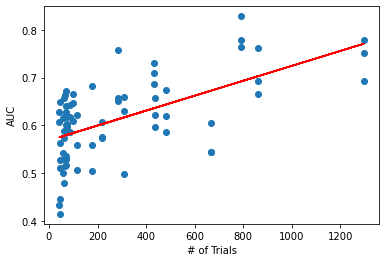

In [28]:
plt.xlabel("# of Trials")
plt.ylabel("AUC")
plt.scatter(all_ns, all_aucs, marker='o')
y = np.array(all_aucs)
x = np.array(all_ns)
x = x.reshape(x.shape[0], 1)
X = np.append(x, np.ones((x.shape[0], 1)), axis=1)
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
y_line = X.dot(theta)
plt.plot(x, y_line, 'r')
plt.show()


In [30]:
print("correlation coefficient:", scipy.stats.pearsonr(all_ns, all_aucs)[0])

correlation coefficient: 0.5936574795637903


In [31]:
print("p-value:", scipy.stats.pearsonr(all_ns, all_aucs)[1])

p-value: 1.9822999299420758e-08
